In [3]:
# 📌 STEP 1: Import Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Optional: set plotting style
sns.set(style="whitegrid")
plt.rcParams['figure.figsize'] = (10, 5)

# 📌 STEP 2: Load Dataset
df = pd.read_csv('../data/Electric Vehicle Sales by State in India.csv')
print("Shape:", df.shape)
df.head()


Shape: (96845, 8)


,Year,Month_Name,Date,State,Vehicle_Class,Vehicle_Category,Vehicle_Type,EV_Sales_Quantity
0,2014.0,jan,1/1/2014,Andhra Pradesh,ADAPTED VEHICLE,Others,Others,0.0
1,2014.0,jan,1/1/2014,Andhra Pradesh,AGRICULTURAL TRACTOR,Others,Others,0.0
2,2014.0,jan,1/1/2014,Andhra Pradesh,AMBULANCE,Others,Others,0.0
3,2014.0,jan,1/1/2014,Andhra Pradesh,ARTICULATED VEHICLE,Others,Others,0.0
4,2014.0,jan,1/1/2014,Andhra Pradesh,BUS,Bus,Bus,0.0


In [6]:
# 📌 STEP 3: Basic Info
df.info()

# 📌 STEP 4: Missing & Duplicate Check
print("Missing values:\n", df.isnull().sum())
print("\nDuplicates:", df.duplicated().sum())


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 96845 entries, 0 to 96844
Data columns (total 8 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Year               96845 non-null  float64
 1   Month_Name         96845 non-null  object 
 2   Date               96845 non-null  object 
 3   State              96845 non-null  object 
 4   Vehicle_Class      96845 non-null  object 
 5   Vehicle_Category   96845 non-null  object 
 6   Vehicle_Type       96845 non-null  object 
 7   EV_Sales_Quantity  96845 non-null  float64
dtypes: float64(2), object(6)
memory usage: 5.9+ MB
Missing values:
 Year                 0
Month_Name           0
Date                 0
State                0
Vehicle_Class        0
Vehicle_Category     0
Vehicle_Type         0
EV_Sales_Quantity    0
dtype: int64

Duplicates: 0


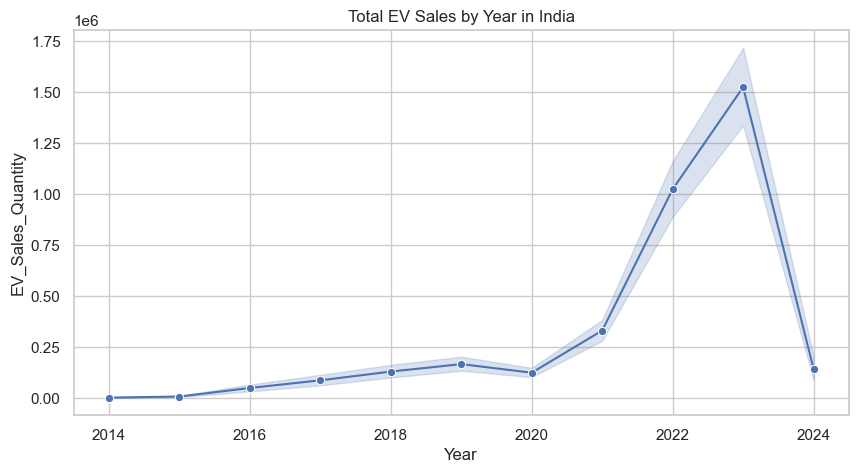

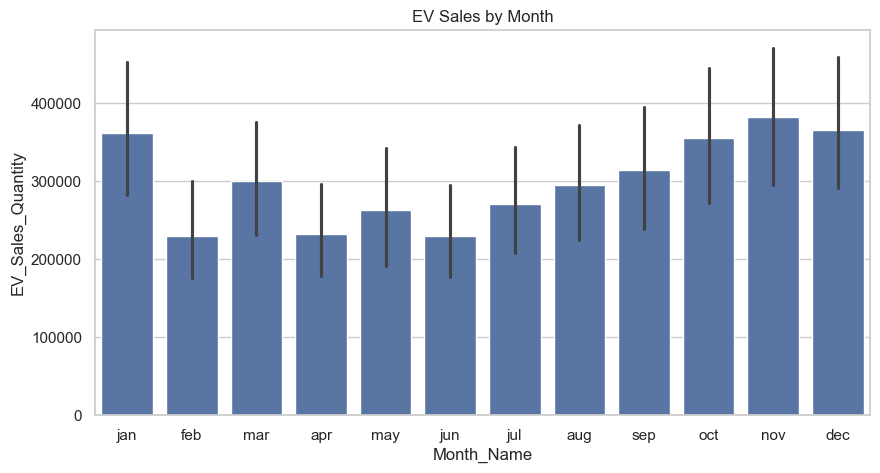

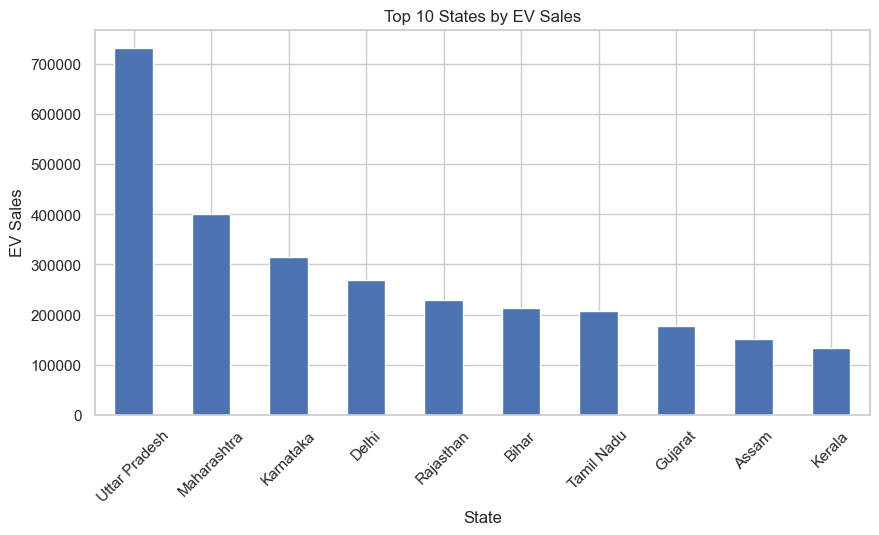

In [9]:
# 📌 Yearly EV Sales Trend
plt.figure()
sns.lineplot(data=df, x='Year', y='EV_Sales_Quantity', estimator='sum', marker='o')
plt.title("Total EV Sales by Year in India")
plt.show()

# 📌 Monthly Sales Pattern
plt.figure()
sns.barplot(data=df, x='Month_Name', y='EV_Sales_Quantity', estimator='sum', order=[
    'jan', 'feb', 'mar', 'apr', 'may', 'jun', 'jul', 'aug', 'sep', 'oct', 'nov', 'dec'])
plt.title("EV Sales by Month")
plt.show()

# 📌 Top 10 States with Highest Sales
top_states = df.groupby('State')['EV_Sales_Quantity'].sum().sort_values(ascending=False).head(10)
top_states.plot(kind='bar', title='Top 10 States by EV Sales')
plt.ylabel('EV Sales')
plt.xticks(rotation=45)
plt.show()



In [11]:
import sys
sys.path.append('../src')
from preprocess import preprocess_ev_data


In [3]:
df = preprocess_ev_data('../data/Electric Vehicle Sales by State in India.csv')
df.info()
df.head()


NameError: name 'preprocess_ev_data' is not defined

In [5]:
import sys
sys.path.append('../src')  # to import files from src folder

from preprocess import preprocess_ev_data  # ✅ this line is missing in your screenshot


In [7]:
df = preprocess_ev_data('../data/Electric Vehicle Sales by State in India.csv')
df.info()
df.head()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 96845 entries, 0 to 96844
Data columns (total 10 columns):
 #   Column             Non-Null Count  Dtype         
---  ------             --------------  -----         
 0   Year               96845 non-null  int32         
 1   Month_Name         96845 non-null  category      
 2   Date               96845 non-null  datetime64[ns]
 3   State              96845 non-null  category      
 4   Vehicle_Class      96845 non-null  category      
 5   Vehicle_Category   96845 non-null  category      
 6   Vehicle_Type       96845 non-null  category      
 7   EV_Sales_Quantity  96845 non-null  int64         
 8   Month              96845 non-null  int32         
 9   Day                96845 non-null  int32         
dtypes: category(5), datetime64[ns](1), int32(3), int64(1)
memory usage: 3.1 MB


,Year,Month_Name,Date,State,Vehicle_Class,Vehicle_Category,Vehicle_Type,EV_Sales_Quantity,Month,Day
0,2014,jan,2014-01-01,Andhra Pradesh,ADAPTED VEHICLE,Others,Others,0,1,1
1,2014,jan,2014-01-01,Andhra Pradesh,AGRICULTURAL TRACTOR,Others,Others,0,1,1
2,2014,jan,2014-01-01,Andhra Pradesh,AMBULANCE,Others,Others,0,1,1
3,2014,jan,2014-01-01,Andhra Pradesh,ARTICULATED VEHICLE,Others,Others,0,1,1
4,2014,jan,2014-01-01,Andhra Pradesh,BUS,Bus,Bus,0,1,1


In [9]:
from eda import (
    plot_yearly_sales,
    plot_monthly_sales,
    plot_top_states,
    plot_by_vehicle_category,
    plot_by_vehicle_type
)


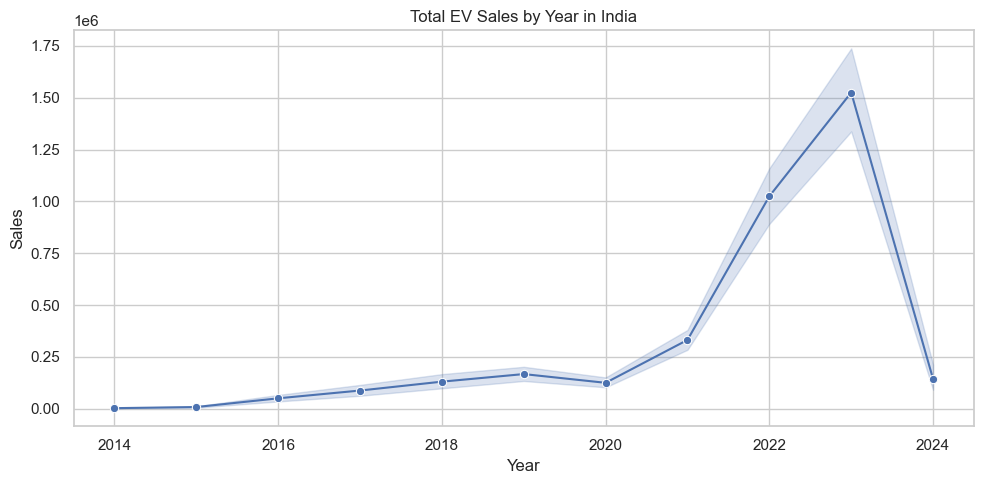

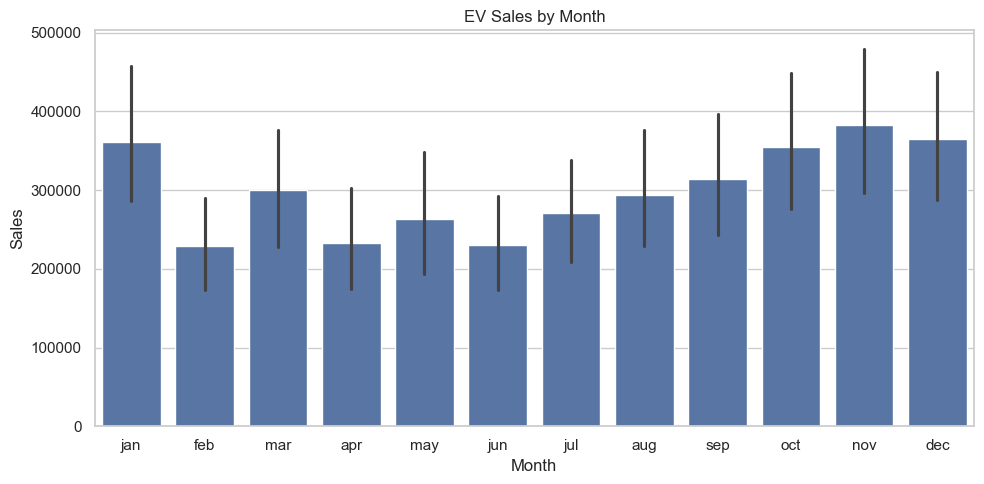

c:\Users\jayku\OneDrive\Desktop\ev_sales_dashboard_project\notebooks\../src\eda.py:29: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  top_states = df.groupby('State')['EV_Sales_Quantity'].sum().sort_values(ascending=False).head(top_n)


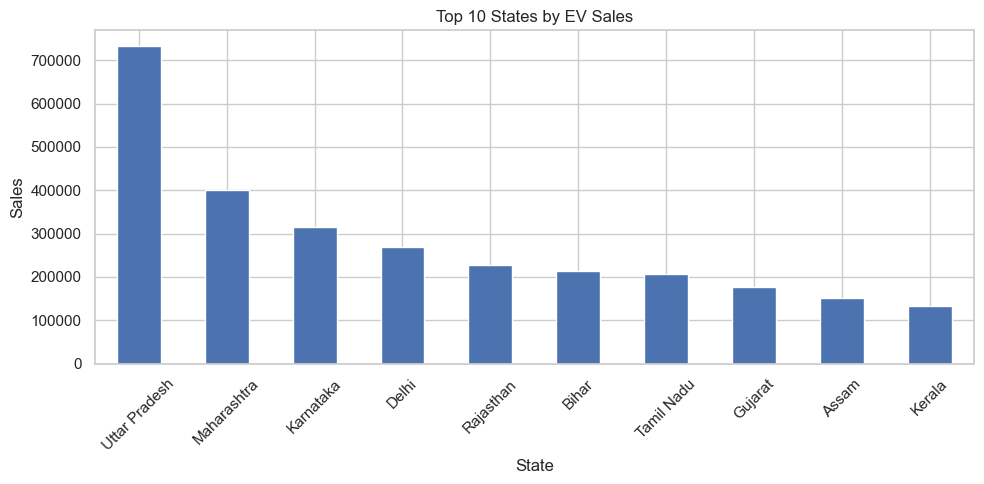

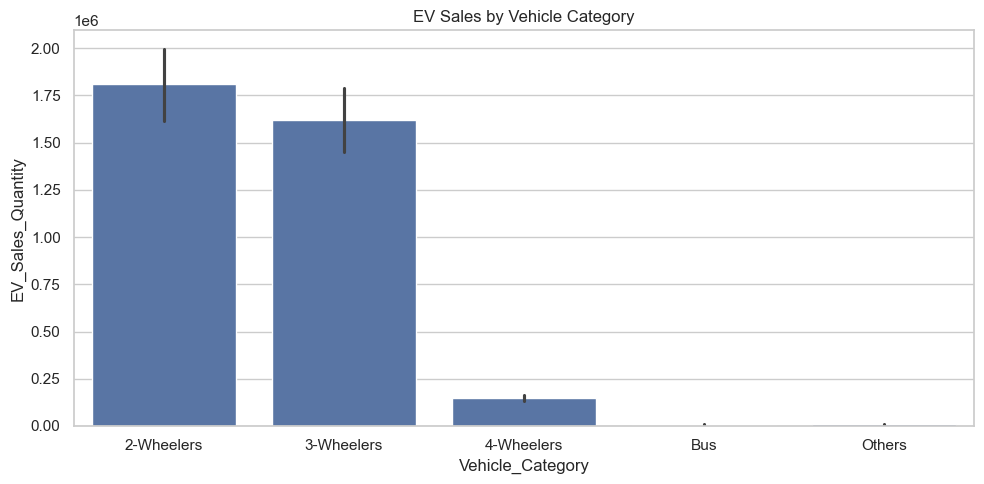

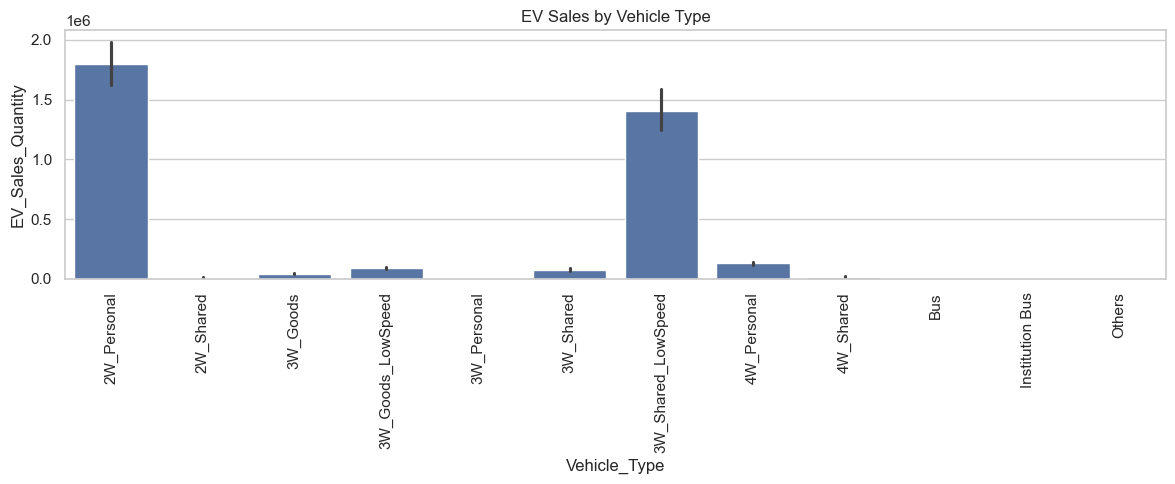

In [11]:
plot_yearly_sales(df).show()
plot_monthly_sales(df).show()
plot_top_states(df).show()
plot_by_vehicle_category(df).show()
plot_by_vehicle_type(df).show()


In [13]:
from model import train_model


In [15]:
model, X_test, y_test, y_pred = train_model(df)


✅ Model Trained - RMSE: 130.58
